In [2]:
import nibabel as nib
import numpy as np
import os

def split_image(image_data, cube_size=(64, 64, 64)):
    image_shape = image_data.shape
    num_cubes = (np.array(image_shape) / np.array(cube_size)).astype(int)
    cubes = []

    for i in range(num_cubes[0]):
        for j in range(num_cubes[1]):
            for k in range(num_cubes[2]):
                cube = image_data[i*cube_size[0]:(i+1)*cube_size[0],
                                   j*cube_size[1]:(j+1)*cube_size[1],
                                   k*cube_size[2]:(k+1)*cube_size[2]]
                cubes.append(cube)

    return cubes

def save_cubes(cubes, output_dir, begin_n = 0):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, cube in enumerate(cubes):
        cube_filename = os.path.join(output_dir, f"cube_{i+begin_n}.nii.gz")
        nib.save(nib.Nifti1Image(cube, np.eye(4)), cube_filename)




In [3]:
nii_file = "./reg_data/00004_01_429x689x410_0-1640625_0-42578125.nii.gz"
img = nib.load(nii_file)
image_data = img.get_fdata()


cubes = split_image(image_data)


output_dir = "./reg_data/04"
save_cubes(cubes, output_dir)


In [4]:
nii_file = "./reg_data/00004_02_429x689x410_0-41015625_0-6875.nii.gz"
img = nib.load(nii_file)
image_data = img.get_fdata()


cubes = split_image(image_data)


output_dir = "./reg_data/04"
save_cubes(cubes, output_dir,begin_n=360)

In [5]:
from matplotlib import pyplot as plt

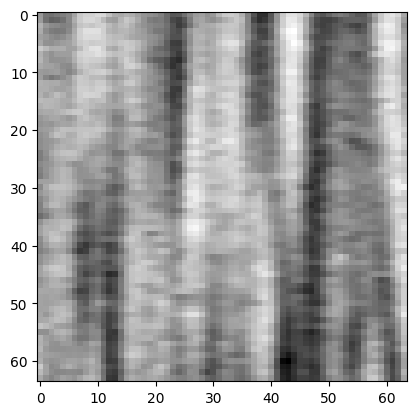

In [6]:
im00 = nib.load("./reg_data/00/cube_356.nii.gz")
im00 = im00.get_fdata()
plt.imshow(im00[:,32,:], cmap='gray')

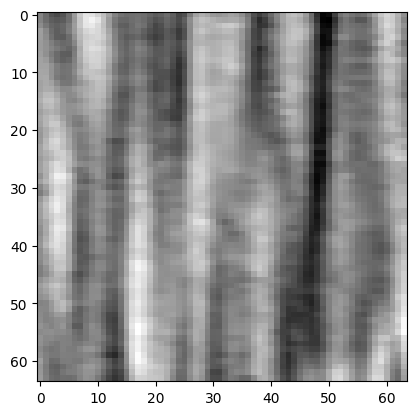

In [7]:
im12 = nib.load("./reg_data/12/cube_356.nii.gz")
im12 = im12.get_fdata()
plt.imshow(im12[:,32,:], cmap='gray')